In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
class_names[y_train[0]]

'Coat'

In [7]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28, 28]),
                            keras.layers.Dense(300, activation="relu"),
                            keras.layers.Dense(100, activation="relu"),
                            keras.layers.Dense(10, activation="softmax")
                            ])




In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss= "sparse_categorical_crossentropy",
                      optimizer = "sgd",
                      metrics = ["accuracy"]
                      )

In [10]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.7086 - accuracy: 0.7663 - val_loss: 0.4957 - val_accuracy: 0.8354
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4867 - accuracy: 0.8297 - val_loss: 0.4336 - val_accuracy: 0.8552
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4431 - accuracy: 0.8451 - val_loss: 0.4352 - val_accuracy: 0.8492
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4169 - accuracy: 0.8540 - val_loss: 0.4029 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3954 - accuracy: 0.8607 - val_loss: 0.3840 - val_accuracy: 0.8682
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3795 - accuracy: 0.8663 - val_loss: 0.3677 - val_accuracy: 0.8748
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3674 - accuracy: 0.8700 - val_loss: 0.3624 - val_accuracy:

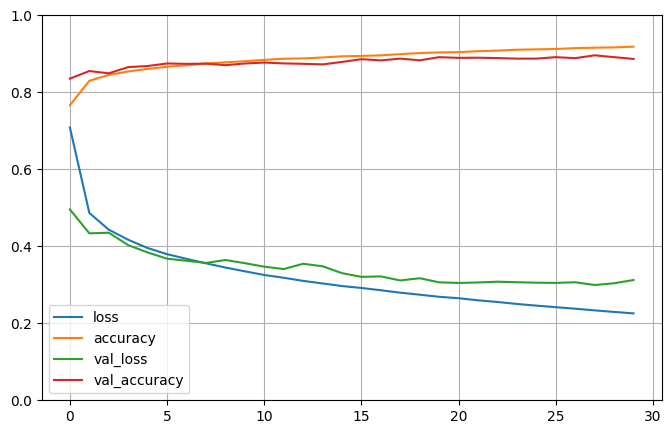

In [11]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 56.8303 - accuracy: 0.8585


[56.830257415771484, 0.8585000038146973]

In [13]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred)
print(class_names)

1/1 [==============================] - 0s 149ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
